# Function Transformer

In [ ]:
import numpy as np
import pandas as pd
import io
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']),usecols=['Survived','Age','Fare'])

In [ ]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [ ]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace= True)

In [ ]:
X= df.iloc[:,1:3]
y= df.iloc[:,0]

In [ ]:
# now train test split
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Ploting the graph

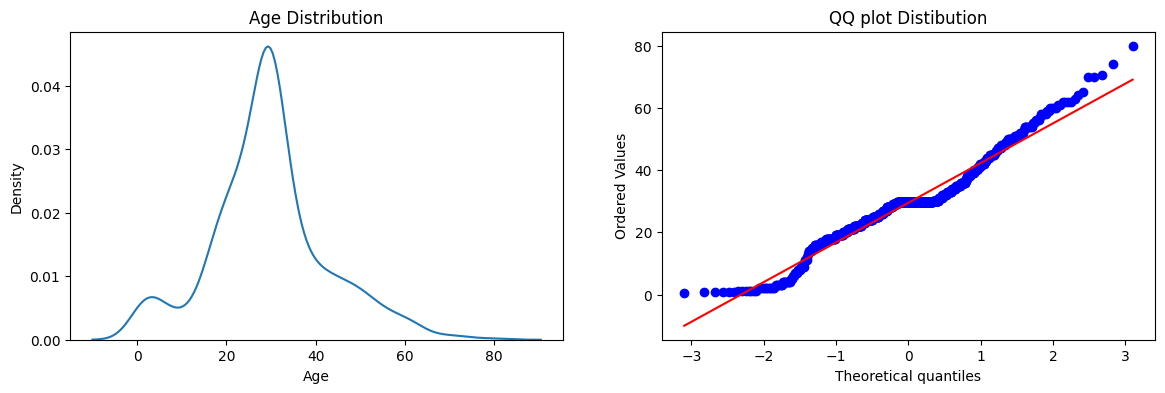

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.kdeplot(X_train['Age'])
plt.title("Age Distribution")


plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm',plot=plt)
plt.title("QQ plot Distibution")

plt.show()

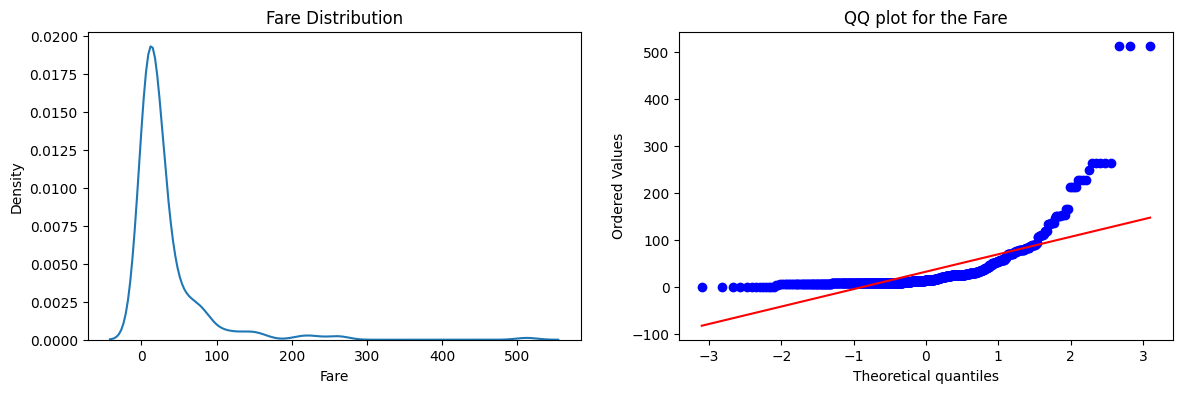

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.kdeplot(X_train['Fare'])
plt.title("Fare Distribution")

plt.subplot(122)
stats.probplot(X_train['Fare'] , dist='norm', plot = plt)
plt.title("QQ plot for the Fare")

plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
logmodel = LogisticRegression()
tmodel = DecisionTreeClassifier()

In [ ]:
# model traning
logmodel.fit(X_train,y_train)
tmodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred1= logmodel.predict(X_test)
y_pred2  = tmodel.predict(X_test)

## Before transformation

In [ ]:
# accuracy clalculation
print("acuuracy score for Logistic regresion:", accuracy_score(y_test,y_pred1))
print("acuuracy score for Decision tree:", accuracy_score(y_test,y_pred2))

acuuracy score for Logistic regresion: 0.6480446927374302
acuuracy score for Decision tree: 0.6536312849162011


# Now Let's apply the the funtion tranformer (log Transformer ) in data
# for the right swked data we have to use log transformer

In [ ]:
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(func= np.log1p)

In [ ]:
X_tain_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

# plt after the Funtion transformer

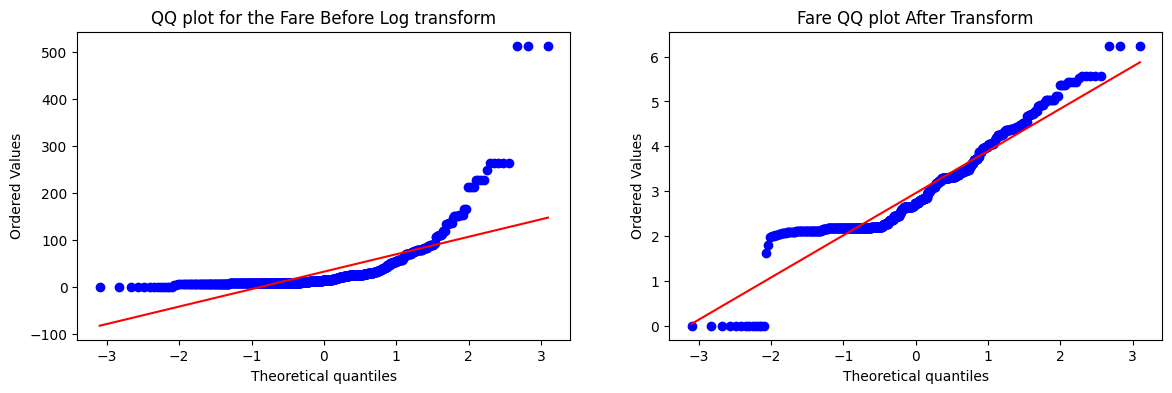

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'] , dist='norm', plot = plt)
plt.title("QQ plot for the Fare Before Log transform")

plt.subplot(122)
stats.probplot(X_tain_transformed ['Fare'] , dist= 'norm', plot= plt)
plt.title("Fare QQ plot After Transform")

plt.show()

In [ ]:
logclf = LogisticRegression()
treeclf = DecisionTreeClassifier()

In [ ]:
logclf.fit(X_tain_transformed , y_train)
treeclf.fit(X_tain_transformed ,y_train)

DecisionTreeClassifier()

In [ ]:
log_pred = logclf.predict(X_test_transformed)
tree_pred = treeclf.predict(X_test_transformed)

In [ ]:
print("Acuuracy after transform Logistic regression :", accuracy_score(y_test , log_pred))
print("Acuuracy after transform Decision Tree :", accuracy_score(y_test , log_pred))

Acuuracy after transform Logistic regression : 0.6815642458100558
Acuuracy after transform Decision Tree : 0.6815642458100558


In [ ]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6543695380774033


# Apply the transformer into funtion and check it

In [ ]:
def apply_tranform(transform):
  X = df.iloc[:,1:3]
  y  = df.iloc[:,0]

  trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

  X_trans = trf.fit_transform(X)
  clf  = LogisticRegression()

  print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

  plt.figure(figsize=(14,4))

  plt.subplot(121)
  stats.probplot(X['Fare'] , dist='norm', plot = plt)
  plt.title("QQ plot for the Fare Before Log transform")

  plt.subplot(122)
  stats.probplot(X_trans[:,0] , dist= 'norm', plot= plt)
  plt.title("Fare QQ plot After Transform")

  plt.show()


Accuracy 0.6442446941323345


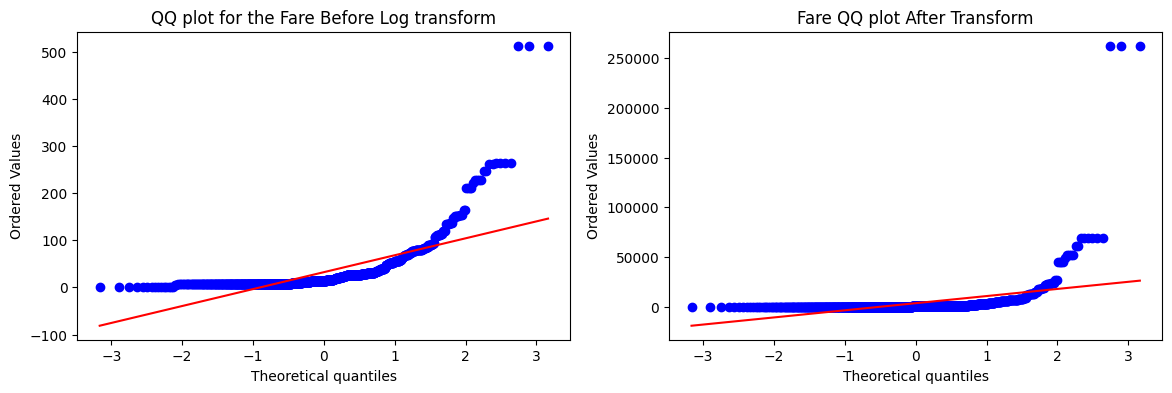

In [ ]:
apply_tranform(lambda x: x**2)